In [1]:
# manips
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

import acquire

In [2]:
df = acquire.acquire_merge_dfs()

Using cached csv
Using cached csv
Using cached csv


In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [7]:
# 1. Convert date column to datetime format

In [6]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [9]:
# 3. Set the index to be datetime variable
df = df.set_index('sale_date').sort_index()

In [10]:
# 2. Plot distribution of sale_amount and item_price

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

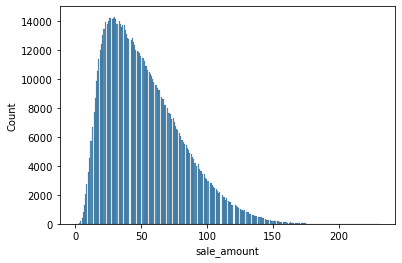

In [11]:
sns.histplot(df.sale_amount)

<AxesSubplot:xlabel='item_price', ylabel='Count'>

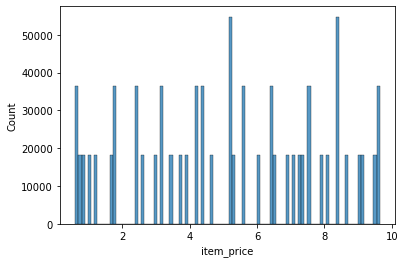

In [12]:
sns.histplot(df.item_price)

In [20]:
# 4. Add 'month' and 'day of week' columns
df['month'] = df.index.strftime('%m-%b')
df['weekday'] = df.index.strftime('%A')

In [21]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,01-Jan,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,01-Jan,Tuesday


In [22]:
# 5. Add 'sales_total' column 
df['sales_total'] = df.sale_amount * df.item_price

In [23]:
# 6. Create a function with above steps
def prep_stores(df):
    '''
    Takes the df of items, store, sale info and converts index to datetime from sale_date, adds month and day of
    week columns, adds a sales_total column (sale_amount * item_price)
    '''
    # Convert to datetime
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # Make index
    df = df.set_index('sale_date').sort_index()
    # Create new columns
    df['month'] = df.index.strftime('%m-%b')
    df['weekday'] = df.index.strftime('%A')
    df['sales_total'] = df.sale_amount * df.item_price
    # Return the df
    return df

## OPS Data

In [24]:
# 1. Convert date column to datetime format
df = acquire.acquire_energy()

In [25]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [27]:
df['Date'] = pd.to_datetime(df.Date)

In [30]:
# 3. Set date to index
df = df.set_index('Date').sort_index()

KeyError: "None of ['Date'] are in the columns"

In [31]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


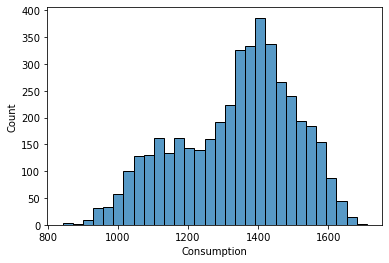

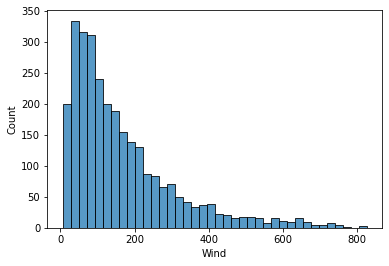

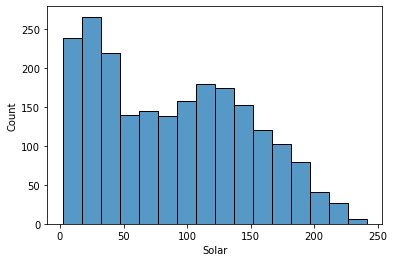

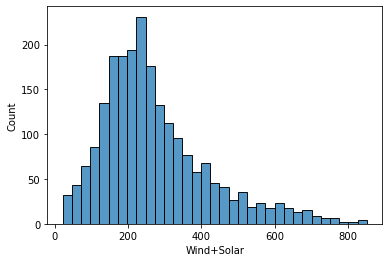

In [32]:
# 2. Plot distribution of variables
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [33]:
# 4. Add a month and year column to df
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year

In [34]:
# 5. Fill any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [35]:
df['Wind'] = df.Wind.fillna(0)
df['Solar'] = df.Solar.fillna(0)
df['Wind+Solar'] = df.Wind + df.Solar

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [38]:
# 6. Make a function of above steps
def prep_opsd(df):
    '''
    Preparation of OPS data
    '''
    # Convert data to datetime and set to index
    df['Date'] = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    # Creation of month and year columns
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    # Filling nulls
    df['Wind'] = df.Wind.fillna(0)
    df['Solar'] = df.Solar.fillna(0)
    df['Wind+Solar'] = df.Wind + df.Solar
    # Return df
    return df